In [1]:
# Re-import necessary libraries as execution state was reset
import numpy as np
import matplotlib.pyplot as plt
import random

# Define the map size
map_size = (100, 100)

# Define start and goal points
start = (10, 10)
goal = (90, 90)
goal_radius = 5  # How close we need to be to the goal to stop

# Define obstacles as circles (center_x, center_y, radius)
obstacles = [
    (40, 40, 10),
    (60, 60, 15),
    (30, 70, 10),
    (70, 20, 12)
]

# RRT parameters
step_size = 5
max_iterations = 500

# Helper function to check collision with obstacles
def is_collision_free(point):
    x, y = point
    for (ox, oy, r) in obstacles:
        if np.sqrt((x - ox) ** 2 + (y - oy) ** 2) < r:
            return False  # Collision detected
    return True

# RRT algorithm
class RRT:
    def __init__(self, start, goal, step_size, max_iterations):
        self.start = start
        self.goal = goal
        self.step_size = step_size
        self.max_iterations = max_iterations
        self.nodes = [start]  # List of explored nodes
        self.parent = {start: None}  # Parent dictionary for backtracking

    def get_random_point(self):
        """Generate a random point in the map."""
        return (random.randint(0, map_size[0]), random.randint(0, map_size[1]))

    def get_nearest_node(self, point):
        """Find the nearest node in the tree."""
        return min(self.nodes, key=lambda n: np.linalg.norm(np.array(n) - np.array(point)))

    def steer(self, from_node, to_node):
        """Move from from_node toward to_node by step_size."""
        vec = np.array(to_node) - np.array(from_node)
        length = np.linalg.norm(vec)
        if length == 0:
            return from_node
        direction = vec / length
        new_node = np.array(from_node) + self.step_size * direction
        return tuple(new_node.astype(int))

    def run(self):
        """Run the RRT algorithm to find a path."""
        for _ in range(self.max_iterations):
            rand_point = self.get_random_point()
            nearest_node = self.get_nearest_node(rand_point)
            new_node = self.steer(nearest_node, rand_point)

            if is_collision_free(new_node):
                self.nodes.append(new_node)
                self.parent[new_node] = nearest_node

                # Check if we reached the goal region
                if np.linalg.norm(np.array(new_node) - np.array(self.goal)) < goal_radius:
                    self.parent[self.goal] = new_node
                    return self.get_path()

        return None  # No path found

    def get_path(self):
        """Backtrack from goal to start to extract the path."""
        path = []
        node = self.goal
        while node is not None:
            path.append(node)
            node = self.parent[node]
        return path[::-1]  # Reverse to get start-to-goal path

# Run RRT
rrt = RRT(start, goal, step_size, max_iterations)
path = rrt.run()

# Visualization
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(0, map_size[0])
ax.set_ylim(0, map_size[1])

# Plot obstacles
for (ox, oy, r) in obstacles:
    circle = plt.Circle((ox, oy), r, color='red', alpha=0.5)
    ax.add_patch(circle)

# Plot RRT tree
for node, parent in rrt.parent.items():
    if parent:
        plt.plot([node[0], parent[0]], [node[1], parent[1]], 'g-', alpha=0.5)

# Plot path
if path:
    path_x, path_y = zip(*path)
    plt.plot(path_x, path_y, 'b-', linewidth=2, label="Path")

# Plot start and goal
plt.scatter(*start, color="blue", s=100, label="Start")
plt.scatter(*goal, color="green", s=100, label="Goal", marker="X")

plt.legend()
plt.title("RRT Path Planning in 2D")
plt.grid()
plt.show()


KeyboardInterrupt: 

Matrix 1:
 [[   0.70710678   -0.70710678  263.43145751]
 [   1.41421356    1.41421356 -491.95959493]
 [   0.            0.            1.        ]]
Matrix 2:
 [[-5.00000000e-01 -1.50000000e+00  7.97573593e+02]
 [ 1.50000000e+00  5.00000000e-01 -3.17573593e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]] 

Matrix 3:
 [[-1.41421356e+00 -1.41421356e+00  1.05195959e+03]
 [ 7.07106781e-01 -7.07106781e-01  1.83431458e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]] 

Matrix 4:
 [[-1.50000000e+00 -5.00000000e-01  8.77573593e+02]
 [-5.00000000e-01 -1.50000000e+00  7.17573593e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]] 

Matrix 5:
 [[-7.07106781e-01  7.07106781e-01  3.76568542e+02]
 [-1.41421356e+00 -1.41421356e+00  9.71959595e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]] 

Matrix 6:
 [[ 5.00000000e-01  1.50000000e+00 -1.57573593e+02]
 [-1.50000000e+00 -5.00000000e-01  7.97573593e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]] 

Matrix 7:
 [[   1.

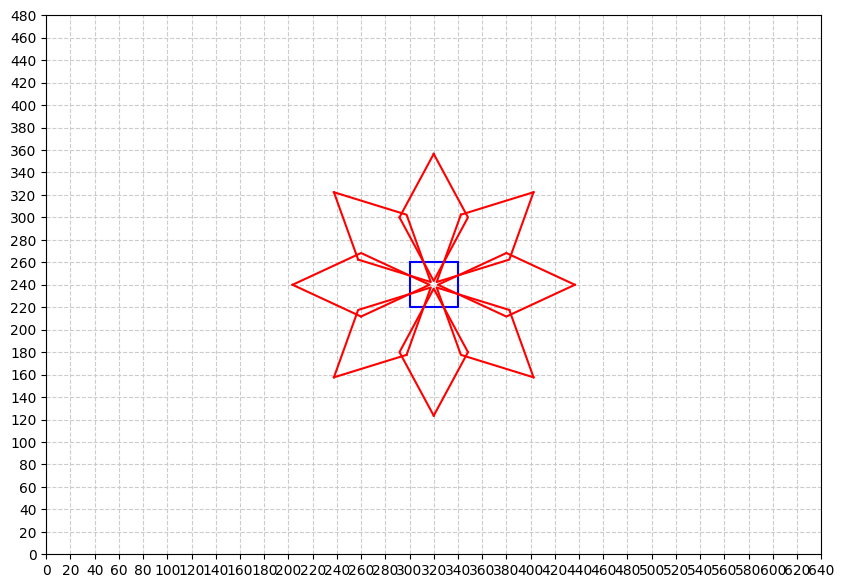

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

def setup_screen(w=640, h=480):
    plt.rcParams["figure.figsize"] = (10, int(10 * (h * 1.0 / w)))
    fig, ax = plt.subplots(1, 1)
    ax.set_xlim([0, w])
    ax.set_ylim([0, h])
    ax.grid(which='major', color='#CCCCCC', linestyle='--')
    ax.grid(which='minor', color='#CCCCCC', linestyle=':')
    ax.xaxis.set_major_locator(MultipleLocator(20))
    ax.yaxis.set_major_locator(MultipleLocator(20))
    return ax

def show():
    plt.show()

def draw(ax, xy, color='blue'):
    x, y = xy[0, :], xy[1, :]
    ax.plot(x, y, color)
    ax.plot([x[-1], x[0]], [y[-1], y[0]], color)

def transform(angle=0, sx=1, sy=1, tx=0, ty=0):
    a = np.deg2rad(angle)
    R = np.array([[np.cos(a), -np.sin(a), 0], [np.sin(a), np.cos(a), 0], [0, 0, 1]])
    S = np.array([[sx, 0, 0], [0, sy, 0], [0, 0, 1]])
    T = np.array([[1, 0, tx], [0, 1, ty], [0, 0, 1]])
    return T @ S @ R

def apply(xy, T):
    return (T @ np.vstack((xy, np.ones((1, xy.shape[1])))))[:2, :]

def task1(xy, cx, cy, d):
    base = transform(angle=45, sx=1, sy=2)
    xy_mid = apply(xy, base)
    tx = cx - np.mean(xy_mid[0, :])
    ty = cy - np.mean(xy_mid[1, :]) + 3 * d
    final = transform(tx=tx, ty=ty) @ base
    return apply(xy, final), final

def rotate(base, cx, cy, angle):
    a = np.deg2rad(angle)
    T1 = np.array([[1, 0, -cx], [0, 1, -cy], [0, 0, 1]])
    R = np.array([[np.cos(a), -np.sin(a), 0], [np.sin(a), np.cos(a), 0], [0, 0, 1]])
    T2 = np.array([[1, 0, cx], [0, 1, cy], [0, 0, 1]])
    return T2 @ R @ T1 @ base

## Setup
w, h = 640, 480
ax = setup_screen(w, h)
cx, cy, d = w / 2, h / 2, 20
xy = np.array([[cx - d, cx - d, cx + d, cx + d], [cy + d, cy - d, cy - d, cy + d]])

draw(ax, xy, color='blue')
xy_task1, base_mat = task1(xy, cx, cy, d)
draw(ax, xy_task1, color='red')
print("Matrix 1:\n", base_mat)

## Task 2

for i in range(1, 8):
    T = rotate(base_mat, cx, cy, i * 45)
    draw(ax, apply(xy, T), color='red')
    print(f"Matrix {i + 1}:\n", T, "\n")

show()
